<a href="https://colab.research.google.com/github/sergioaugusto94/ML_Production_House_Prices/blob/main/ML_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

# **Análise dos Dados**

In [ ]:
data = pd.read_csv('train.csv')

print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.drop('Id', axis = 1, inplace = True)

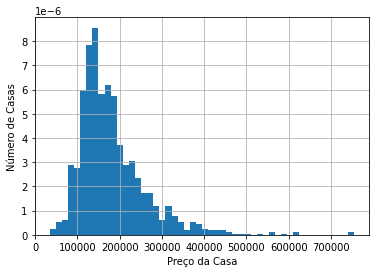

In [ ]:
data['SalePrice'].hist(bins = 50, density = True)
plt.ylabel('Número de Casas')
plt.xlabel('Preço da Casa')
plt.show()


Fazemos uma transformação logaritmica nos preços das casas e observamos que após a transformação, a distribuição dos preços das casas ficou mais parecida com uma curva Gaussiana, que na maioria dos casos ajuda a melhorar a performance do algoritmo desenvolvido.

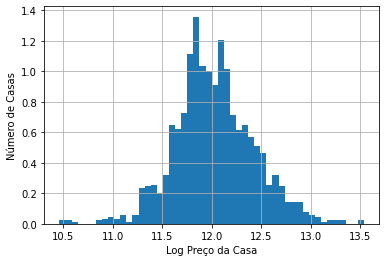

In [ ]:
np.log(data['SalePrice']).hist(bins = 50, density = True)
plt.ylabel('Número de Casas')
plt.xlabel('Log Preço da Casa')
plt.show()

Armazenando as colunas que possuem valores categóricos. 

In [ ]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

cat_vars = cat_vars + ['MSSubClass']

Armazenando as colunas que possuem variáveis numéricas e que não seja o rótulo do problema (O preço das casas).

In [ ]:
num_vars = [var for var in data.columns 
            if var not in cat_vars and var != 'SalePrice']

Verificando as colunas que possuem registros nulos.

In [ ]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

data[vars_with_na].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

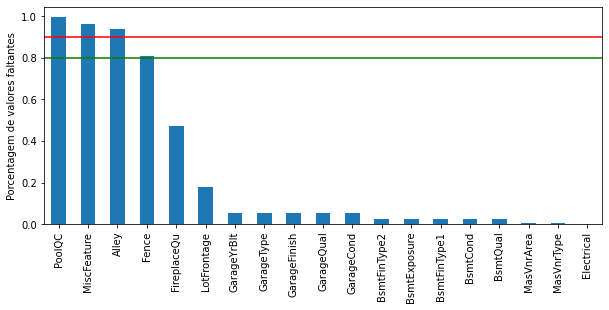

In [ ]:
data[vars_with_na].isnull().mean().sort_values(ascending = False).plot.bar(figsize = (10, 4))
plt.ylabel('Porcentagem de valores faltantes')
plt.axhline(y = 0.90, color = 'r', linestyle = '-')
plt.axhline(y = 0.80, color = 'g', linestyle = '-')

Vamos contar o número de colunas que possuem dados faltantes de cada um dos tipos, Colunas categóricas e Colunas numéricas. 

In [ ]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Número de colunas categóricas com registros nulos: ', len(cat_na))
print('Número de colunas numéricas com registros nulos: ', len(num_na))


Número de colunas categóricas com registros nulos:  16
Número de colunas numéricas com registros nulos:  3


A função abaixo tem o objetivo de comparar o valor médio e o desvio padrão do valor das casas das colunas com valores ausentes. 

In [ ]:
def na_value_analise(df, var):

  #Copiamos o df para que qualquer modificação realizada dentro da 
  #função não seja aplicada no df original. 
  df = df.copy()

  #No df, vamos substituir os registros de uma coluna por 1, caso 
  #o valor esteja ausente ou por 0, caso contenha um valor. 
  df[var] = np.where(df[var].isnull(), 1, 0)

  tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

  tmp.plot(kind = 'barh', y = 'mean', legend = False, xerr = 'std', 
           title = 'Valor da Casa', color = 'green')
  plt.show()

A barra verde indica a média do Valor da Casa para casos em que a variável estudada

Nos gráficos abaixo, temos a média do valor da casa para os registros ausentes (1) e não ausentes (0) para a coluna estudada, representada pela barra verde. Quando as barras estão próximas, significa que a 

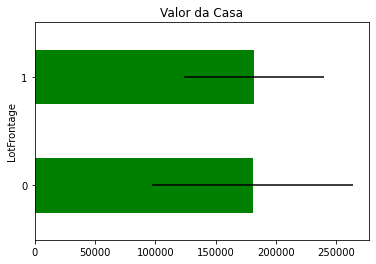

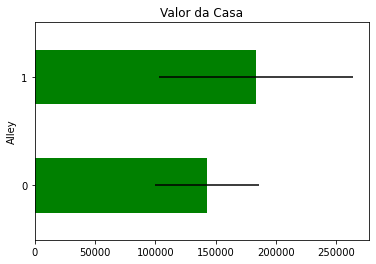

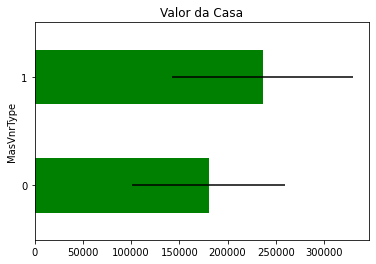

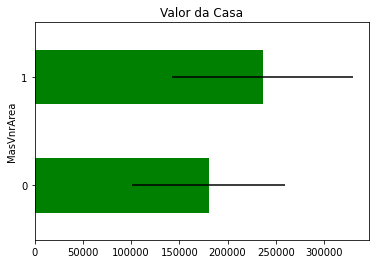

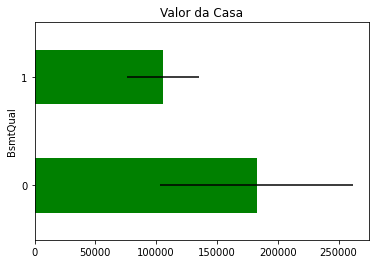

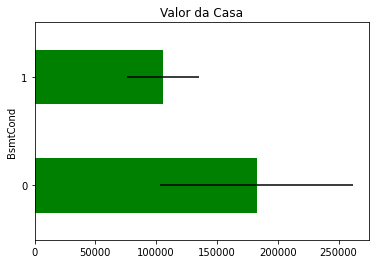

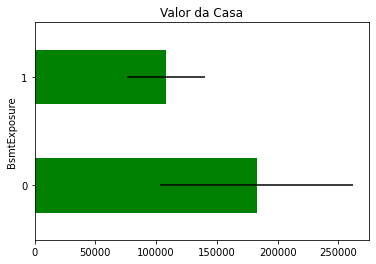

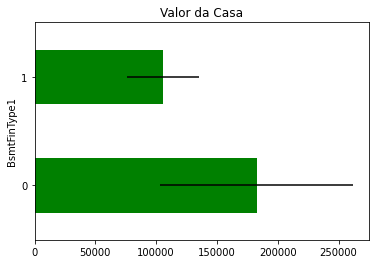

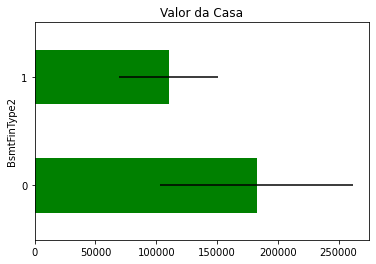

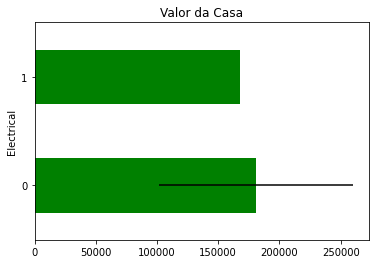

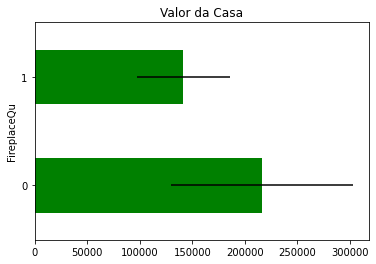

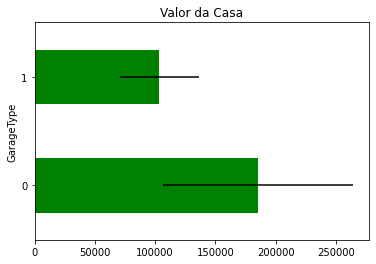

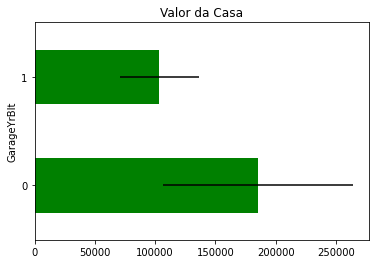

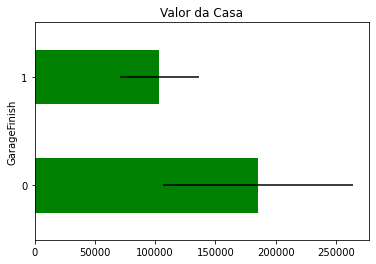

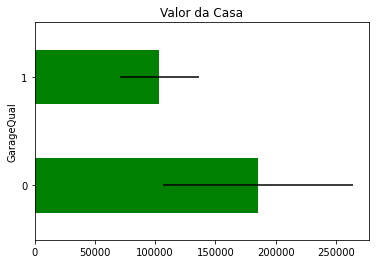

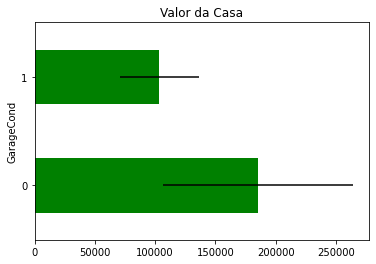

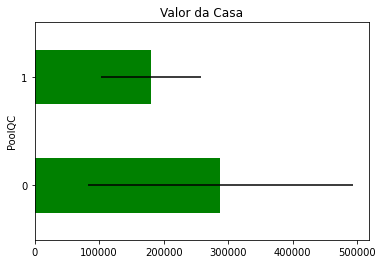

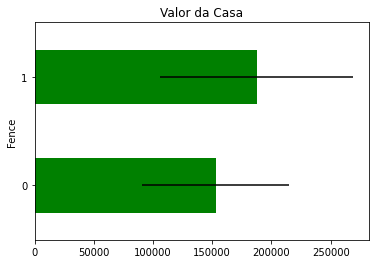

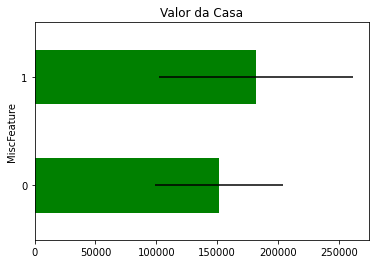

In [ ]:
for var in vars_with_na:
  na_value_analise(data, var)

In [ ]:
year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

Text(0, 0.5, 'Preço Médio da casa')

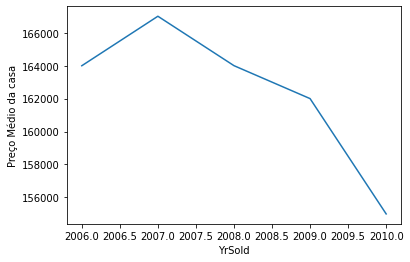

In [ ]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Preço Médio da casa')

Podemos observar que o preço médio de venda das casas cai a partir de 2007, o que contraria o senso comum, que diz que as casas se valorizam com o passar do tempo.

Text(0, 0.5, 'Preço Médio da casa')

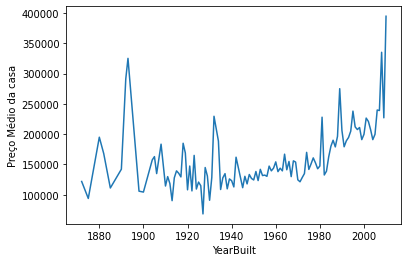

In [ ]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Preço Médio da casa')

Mas esse outro gráfico diz que as casas tendem a se desvalorizar ao longo do tempo, sendo que os maiores preços médios foram registraddos a partir dos anos 2000.

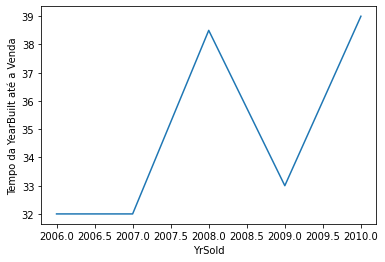

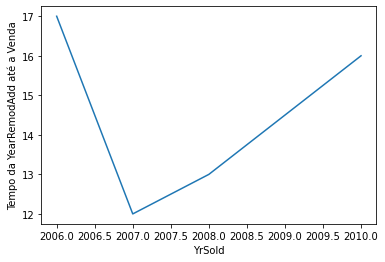

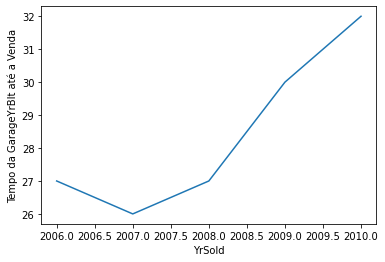

In [ ]:
def analise_ano(df, var):
  df = df.copy()

  # aqui fazemos a diferença entre as datas de quando a casa foi vendida e, 
  # de outra variável estudada (ex: o ano que a casa foi construída)
  df[var] = df['YrSold'] - df[var]
  df.groupby('YrSold')[var].median().plot()
  plt.ylabel('Tempo da ' + var + ' até a Venda')
  plt.show()

for var in year_vars:
  if var != 'YrSold':
    analise_ano(data, var)


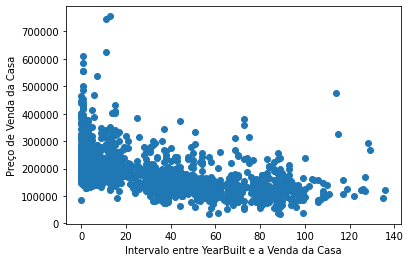

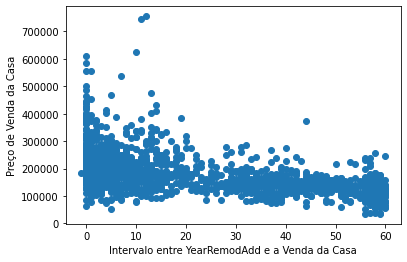

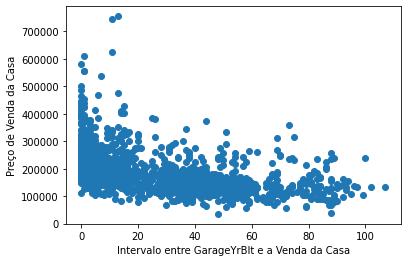

In [ ]:
def analise_ano_scatter(df, var):
  df = df.copy()

  df[var] = df['YrSold'] - df[var]

  plt.scatter(df[var], df['SalePrice'])
  plt.ylabel('Preço de Venda da Casa')
  plt.xlabel('Intervalo entre ' + var + ' e a Venda da Casa')
  plt.show()

for var in year_vars:
  if var != 'YrSold':
    analise_ano_scatter(data, var)

No primeiro gráfico acima, podemos perceber que quanto maior intervalo entre a construção da casa e a sua venda, menor o valor do imóvel. Notamos também que fazer uma reforma na casa ajuda a melhorar o preço da casa.   

## Análise das variáveis discretas

Vamos definir as variáveis discretas como sendo colunas do grupo de variáveis númericas que possuem menos de 20 resultados diferentes.  

In [ ]:
disc_vars = [var for var in num_vars if len(data[var].unique()) < 20 and 
            var not in year_vars]

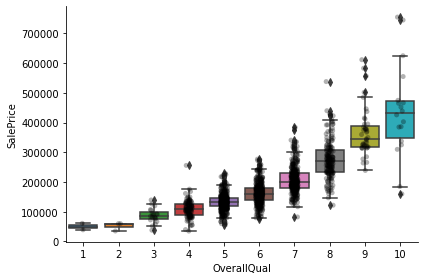

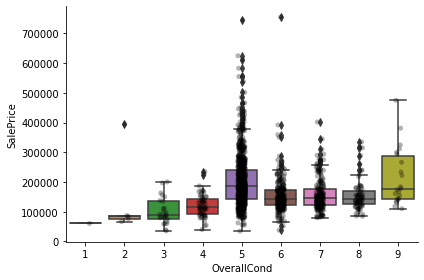

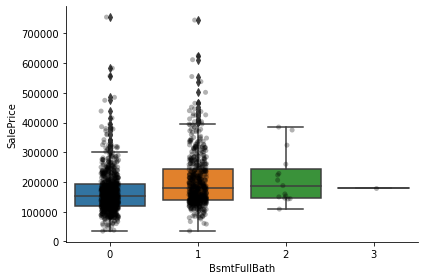

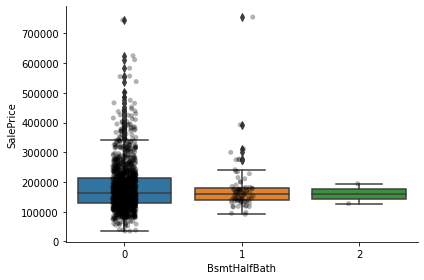

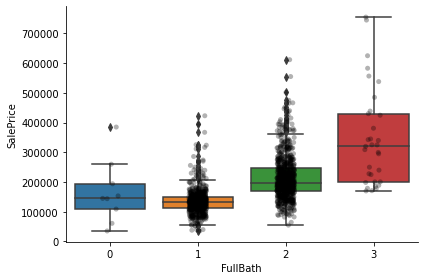

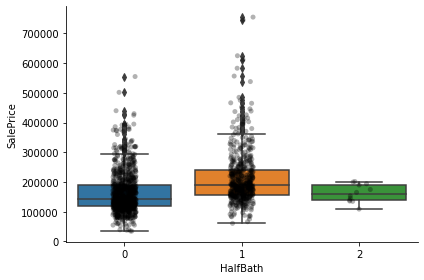

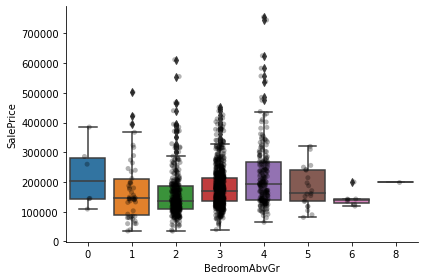

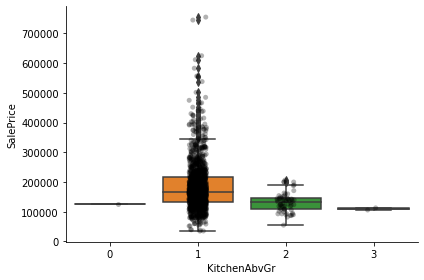

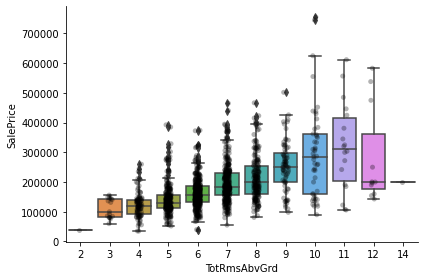

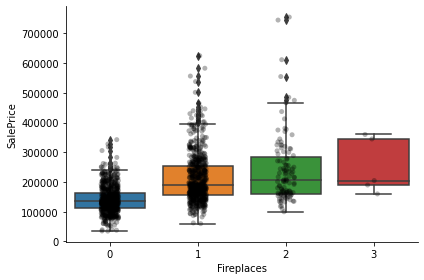

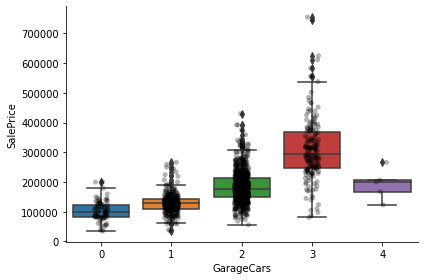

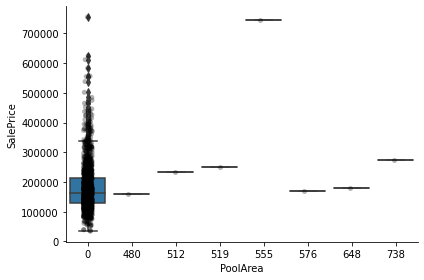

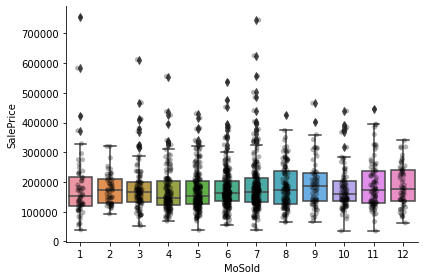

In [ ]:
for var in disc_vars:
  sns.catplot(x = var, y = 'SalePrice', data = data, kind = 'box', height = 4, 
              aspect = 1.5)
  sns.stripplot(x = var, y = 'SalePrice', data = data, jitter = 0.1, alpha = 0.3, 
                color = 'k')
  plt.show()
  

## Análise das variáveis contínuas


In [ ]:
cont_vars = [var for var in num_vars if var not in disc_vars + year_vars]

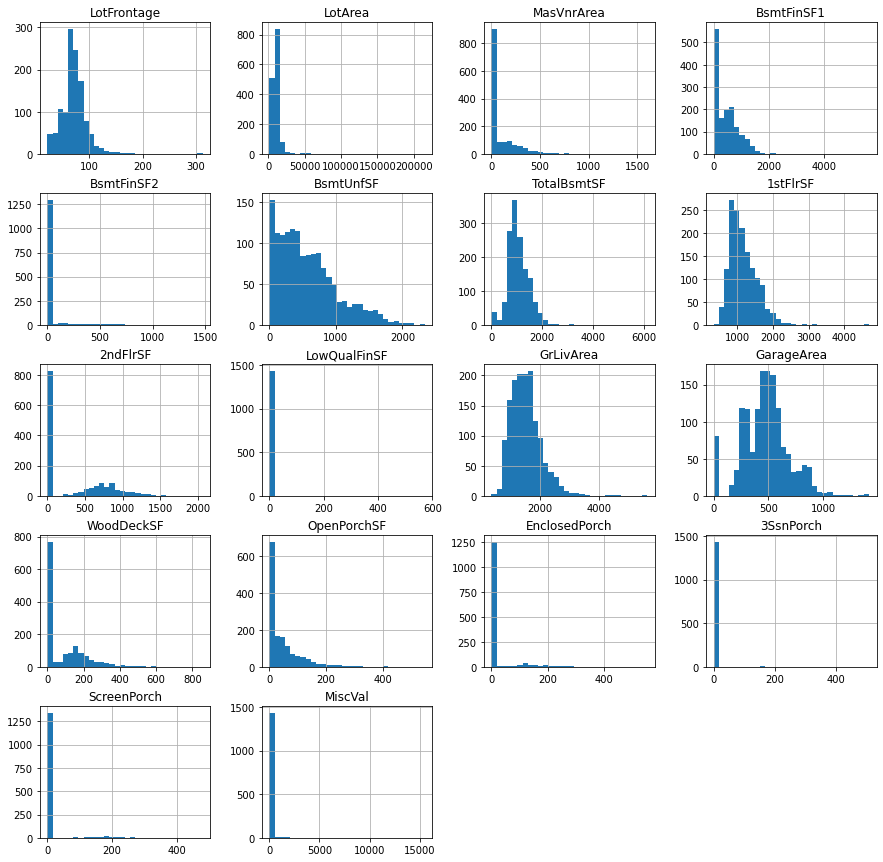

In [ ]:
data[cont_vars].hist(bins = 30, figsize = (15,15))
plt.show()

Podemos perceber que existem algumas variáveis batante enviesadas, como ScreenPorch, MiscVal, 3SsnPorch, BsmtFinSF2, na qual podemos aplicar uma transformação binária.

Em alguns casos, podemos transformar algumas variáveis (LotFrontage, LotArea, BsmUnfSF) para ampliar a faixa de valores, que pode melhorar a performance do modelo. --> Yeo-Johnson

In [ ]:
# separando as variáveis enviesadas

bias_var = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 
            'ScreenPorch', 'MiscVal']

In [ ]:
cont_vars2 = [var for var in cont_vars if var not in bias_var]

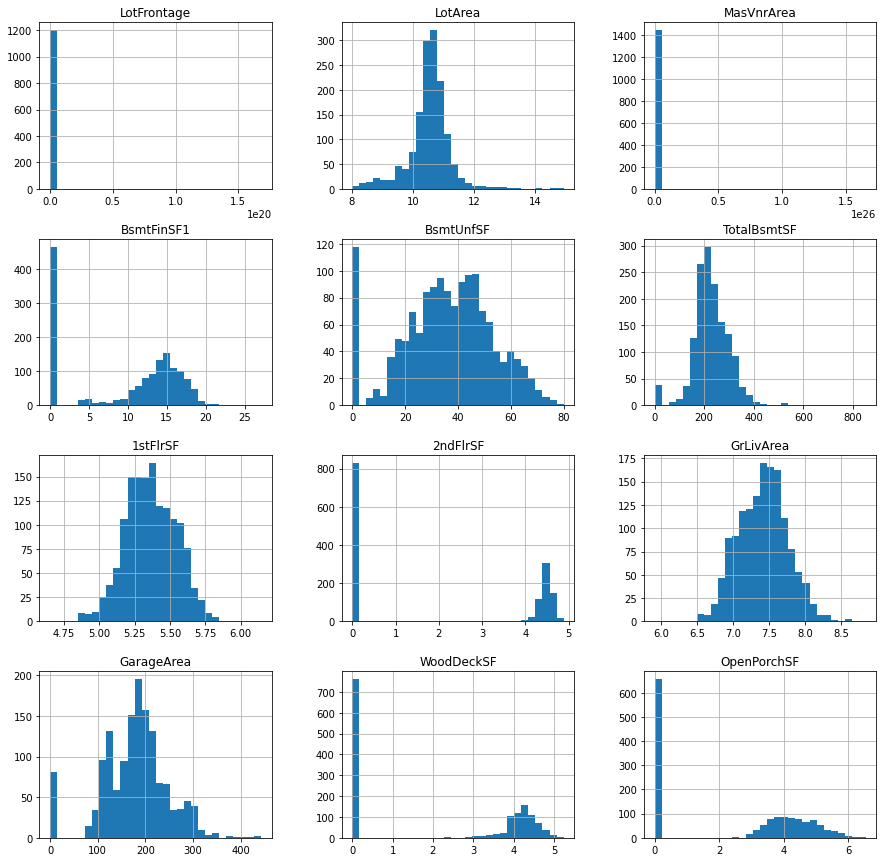

In [ ]:
# Yeo-Johnson transformation

tmp = data.copy()

for var in cont_vars2:
  tmp[var], param = stats.yeojohnson(data[var])

tmp[cont_vars2].hist(bins = 30, figsize = (15, 15))
plt.show()


Vamos plotar agora a relação das variáveis estudadas com o Preço de Venda da Casa e comparar o valor original dessa variável com o valor transformado. 

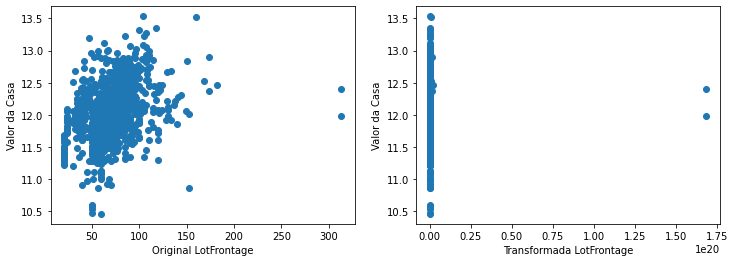

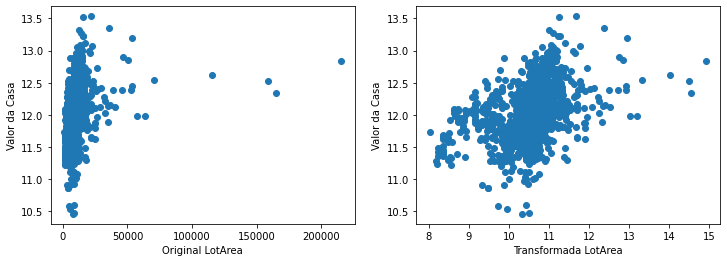

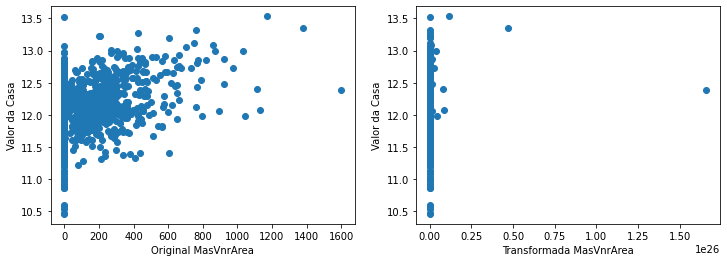

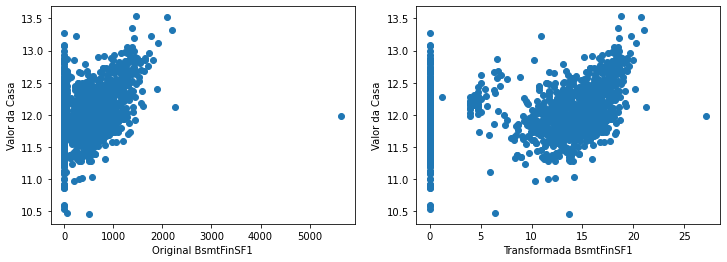

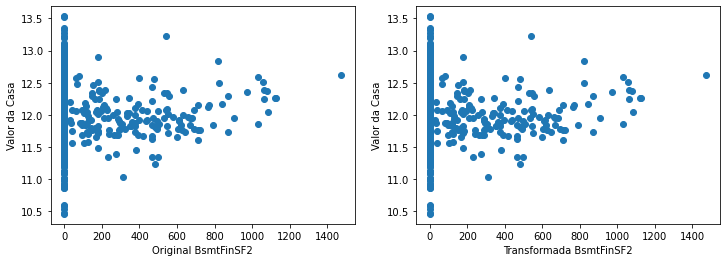

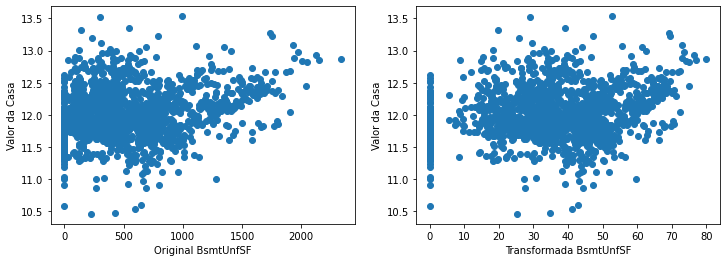

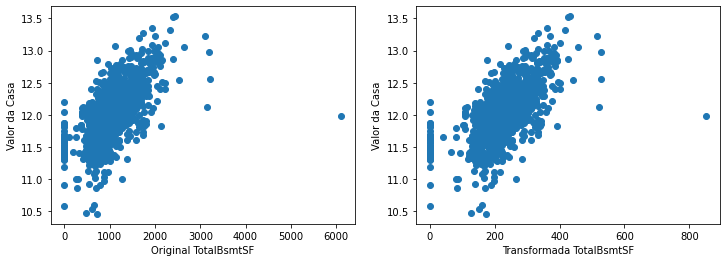

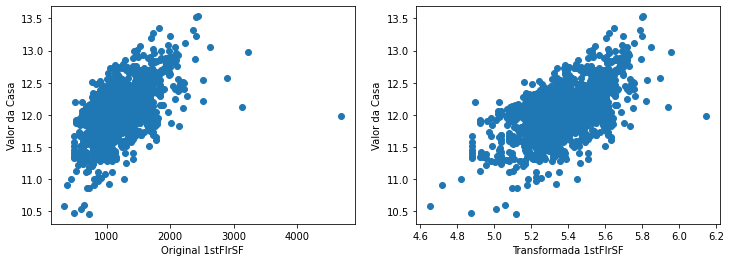

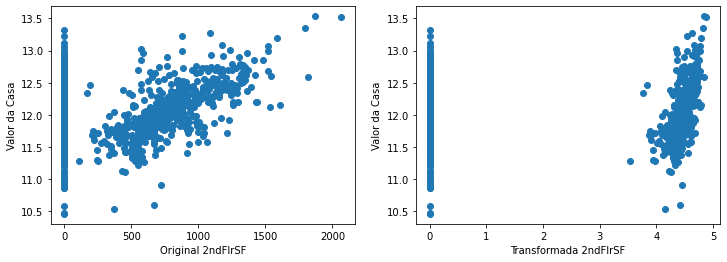

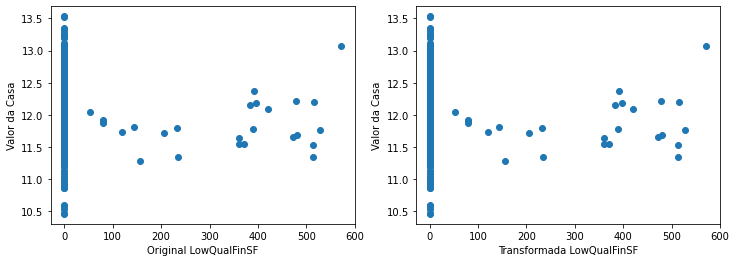

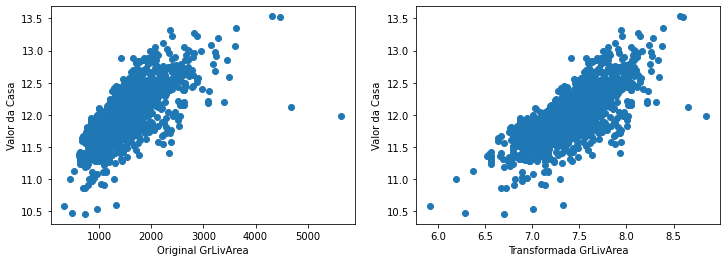

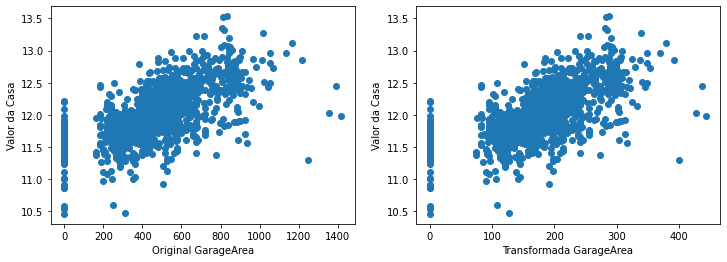

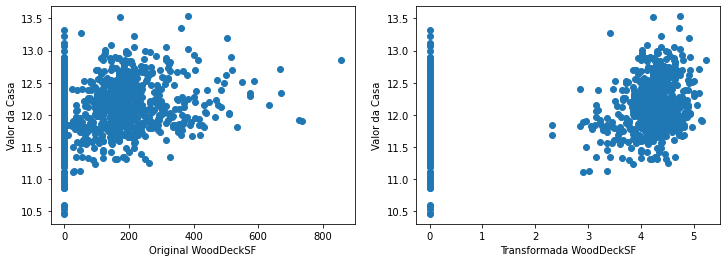

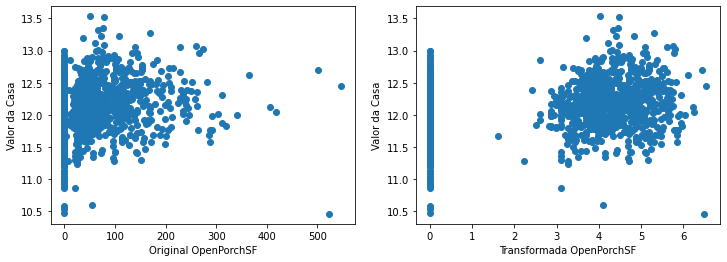

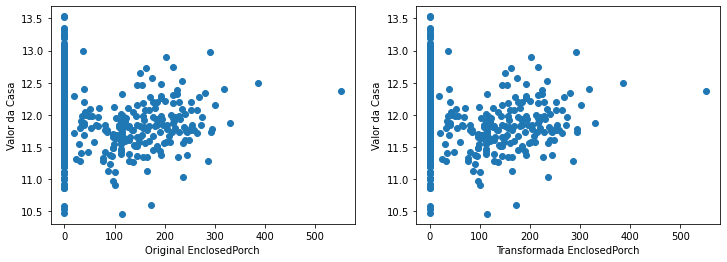

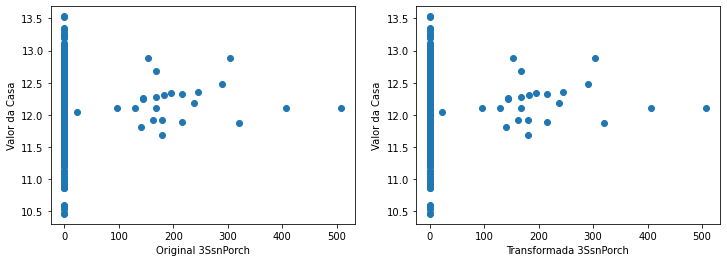

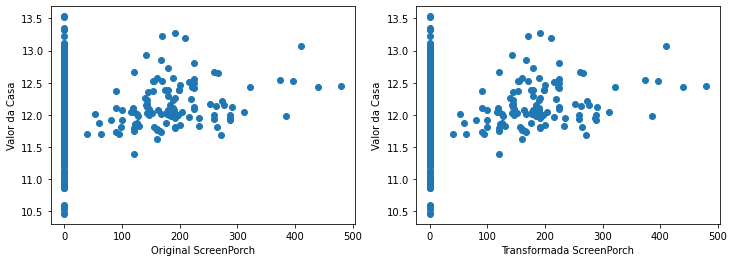

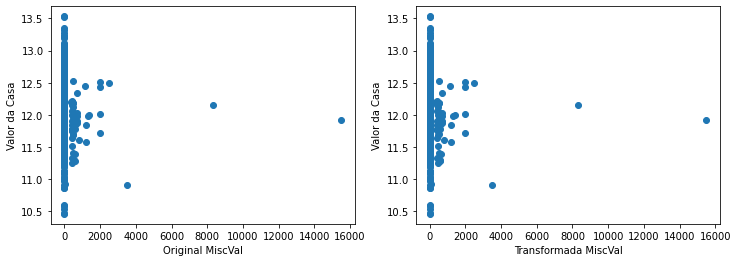

In [ ]:
for var in cont_vars:
  plt.figure(figsize = (12, 4))

  #plotando os valores originais
  plt.subplot(1, 2, 1)
  plt.scatter(data[var], np.log(data['SalePrice']))
  plt.ylabel('Valor da Casa')
  plt.xlabel('Original ' + var)

  #plotando os valores transformados
  plt.subplot(1, 2, 2)
  plt.scatter(tmp[var], np.log(tmp['SalePrice']))
  plt.ylabel('Valor da Casa')
  plt.xlabel('Transformada ' + var)

  plt.show()

Em algumas variáveis como LotArea obtemos uma melhor distribuição dos dados e o modelo pode se beneficiar dessa transformação. Enquanto que váriaveis como LotFrontArea se tornaram mais enviesadas. 

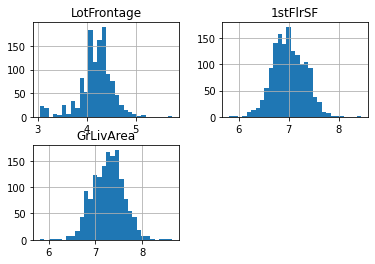

In [ ]:
# vamos aplicar uma transformação logaritmica em algumas variáveis
# obs: elas precisam ter valores maiores que zero. 

for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
  tmp[var] = np.log(data[var])

tmp[['LotFrontage', '1stFlrSF', 'GrLivArea']].hist(bins = 30)
plt.show()



Quando aplicamos a transformação logaritmica nas 3 variáveis acima, obtemos uma distribuição semelhante à Gaussiana. 

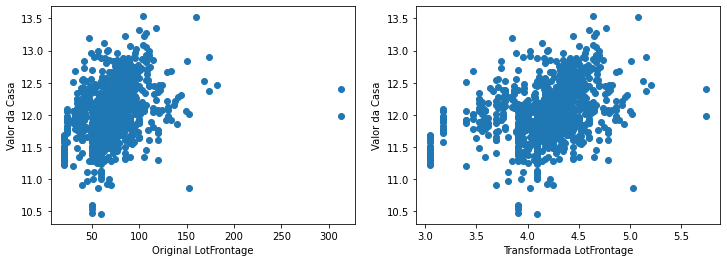

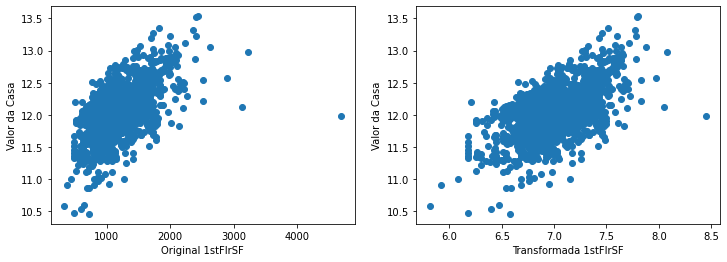

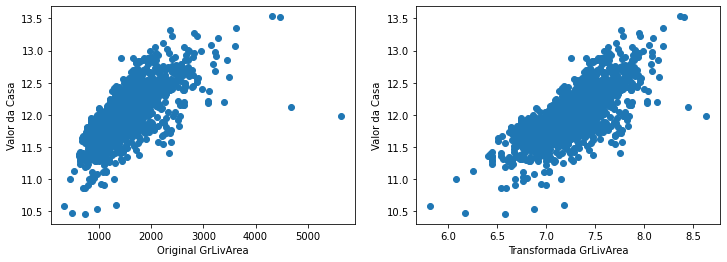

In [ ]:
for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
  plt.figure(figsize = (12, 4))

  #plotando os valores originais
  plt.subplot(1, 2, 1)
  plt.scatter(data[var], np.log(data['SalePrice']))
  plt.ylabel('Valor da Casa')
  plt.xlabel('Original ' + var)

  #plotando os valores transformados
  plt.subplot(1, 2, 2)
  plt.scatter(tmp[var], np.log(tmp['SalePrice']))
  plt.ylabel('Valor da Casa')
  plt.xlabel('Transformada ' + var)

  plt.show()

Vamos agora fazer a conversão binária na variáveis enviesadas. 


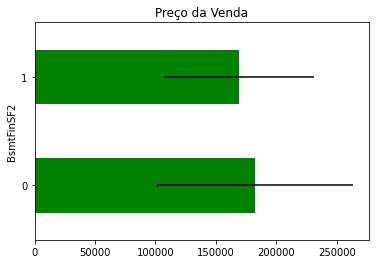

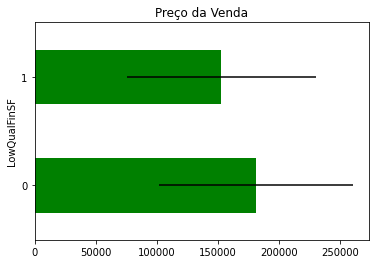

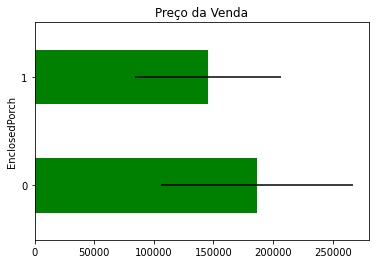

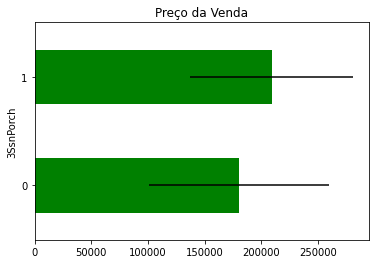

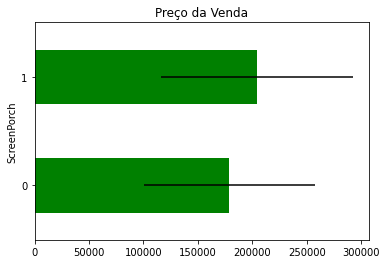

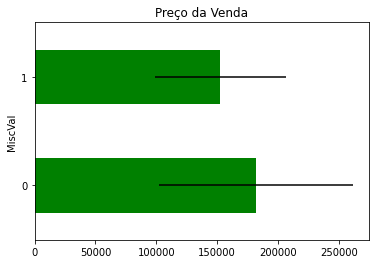

In [ ]:
for var in bias_var:
  tmp = data.copy()

  # Caso a variável tenha valor dirente de 0, ela será substituida por 1
  tmp[var] = np.where(data[var] == 0, 0, 1)

  tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])

  tmp.plot(kind = 'barh', y = 'mean', legend = False, xerr = 'std', 
           title = 'Preço da Venda', color = 'green')
  plt.show()

##Análise das variáveis categóricas

In [ ]:
data[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


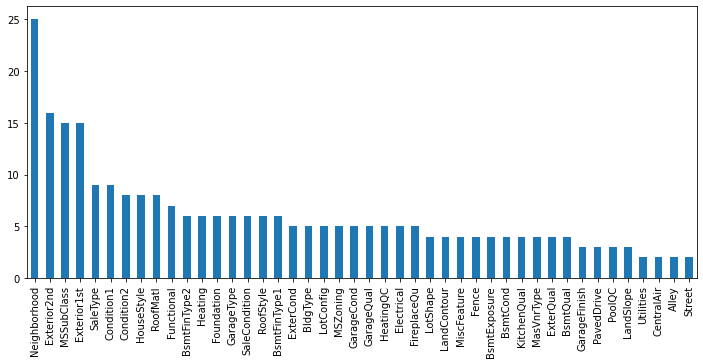

In [ ]:
# Analisando a cardinalidade das variáveis categóricas

data[cat_vars].nunique().sort_values(ascending = False).plot.bar(figsize = 
                                                                (12, 5))

Vamos agora estudar as variáveis qualitativas e substituir por valores discretos. 

In [ ]:
# Vamos então fazer o Remap desses valores

#---Qual vars:
qual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
             'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for var in qual_vars:
  data[var] = data[var].map(qual_map)


#---Exposure var:
exposure_map = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_map)


#---Finish vars:
finish_map = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 
                   'ALQ': 5}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
  data[var] = data[var].map(finish_map)


#---Garage var:
garage_map = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_map)


#---Fence var:
fence_map = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_map)


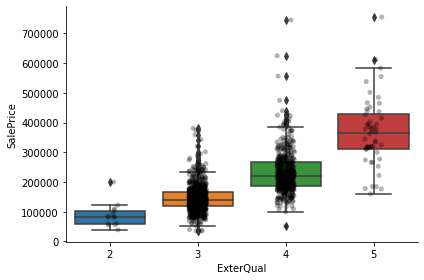

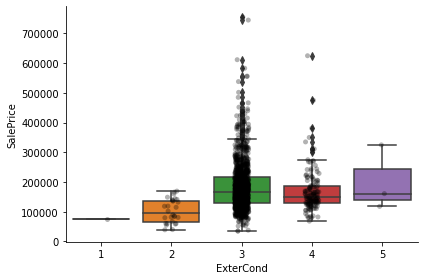

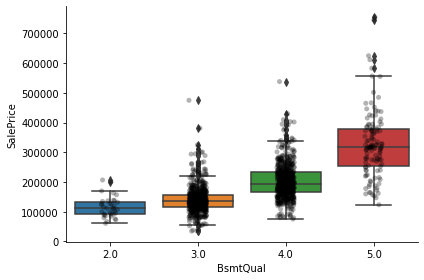

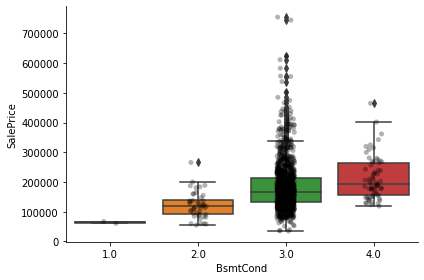

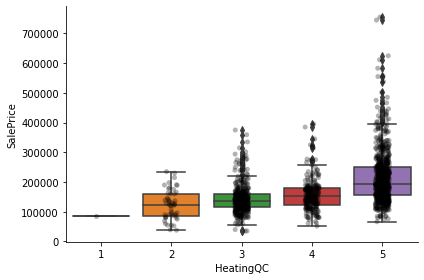

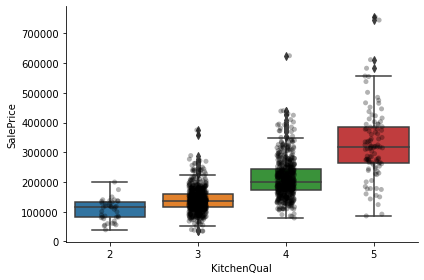

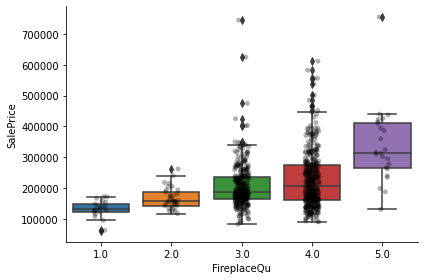

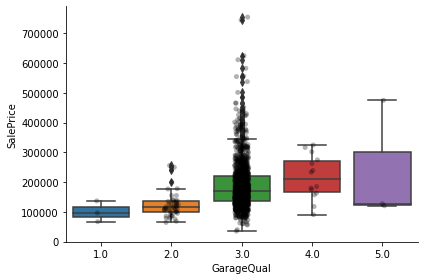

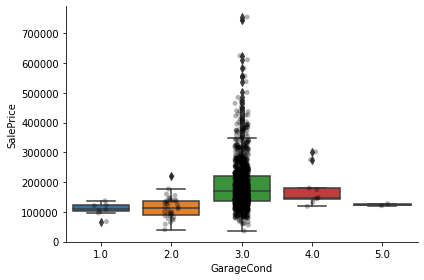

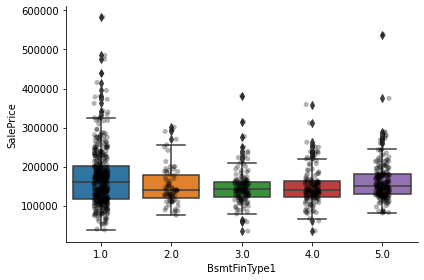

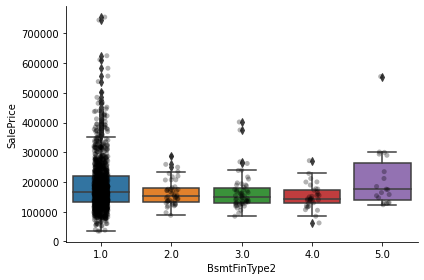

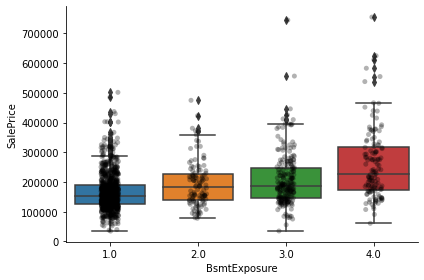

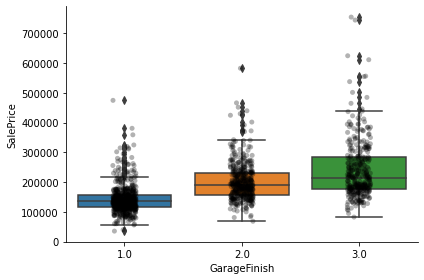

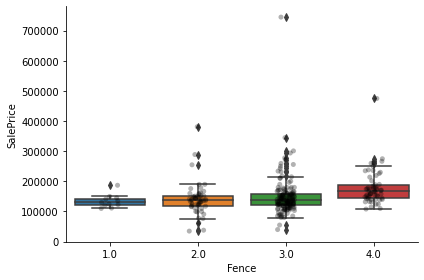

In [ ]:
#Agrupando todas as variáveis qualitativas em uma unica lista

qual_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']

for var in qual_vars:
  sns.catplot(x = var, y = 'SalePrice', data = data, kind = 'box', height = 4,
              aspect = 1.5)
  sns.stripplot(x = var, y = 'SalePrice', data = data, jitter = 0.1, alpha = 0.3, 
                color = 'k')
  plt.show()


Podemos observar, para a maioria das variáveis remapeadas, uma relação de linearidade entre as variáveis qualitativas e o valor das casas. 

In [ ]:
cat_others = [var for var in cat_vars if var not in qual_vars]

Vamos agora verificar quais variáveis possuem rótulos que aparecem com uma frequência muito baixa na base de dados. Devemos eliminar esses dados pois eles podem estar presentes na base de dados de treinamento e não estar presentes na base de dados de teste, ou vice-versa, o que pode gerar problemas na aprendizagem do modelo, como overfitting. 

In [ ]:
data.groupby(cat_others[2])['SalePrice'].count()/len(data)

Alley
Grvl    0.034247
Pave    0.028082
Name: SalePrice, dtype: float64

In [ ]:
# Criar uma função que indica os rótulos que têm uma
# frequencia menor que um determinado percentual. 
def rotulos_raros(df, var, perc):
  
  df = df.copy()

  tmp = df.groupby(var)['SalePrice'].count()/len(df)

  return tmp[tmp < perc]

for var in cat_others:
  print(rotulos_raros(data, var, 0.01))
  print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

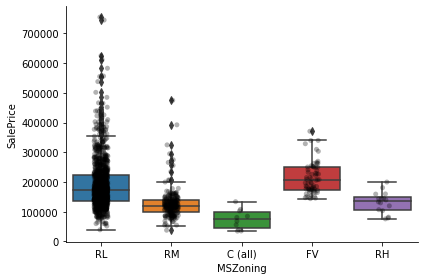

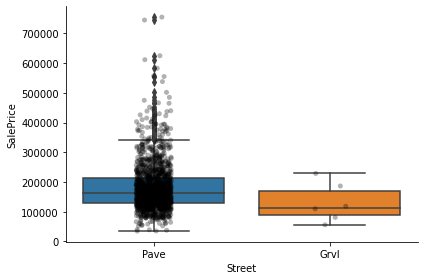

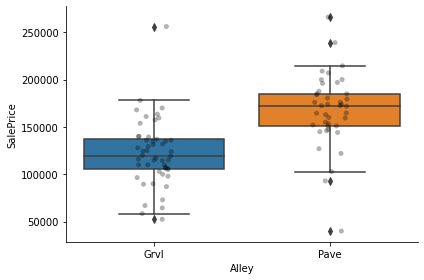

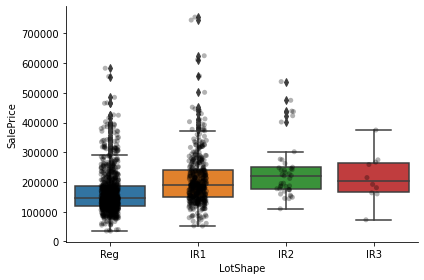

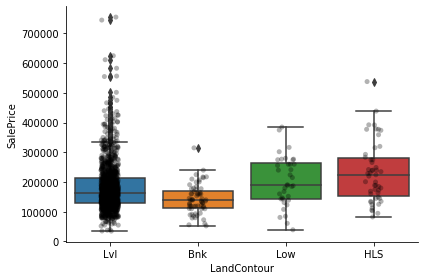

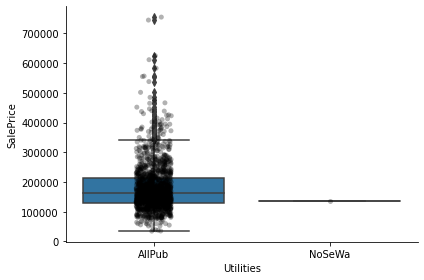

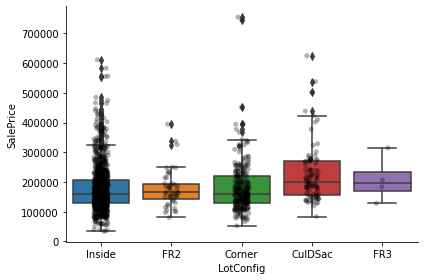

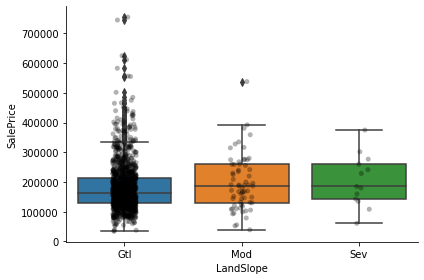

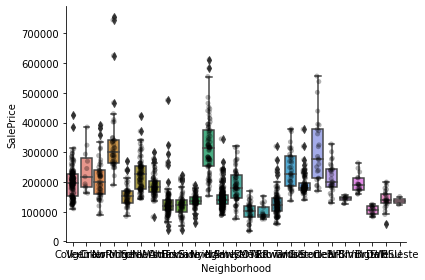

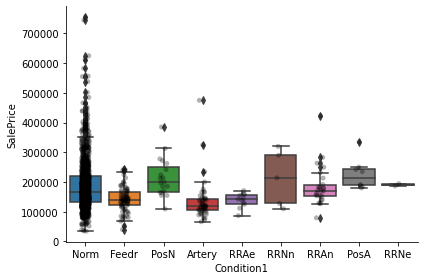

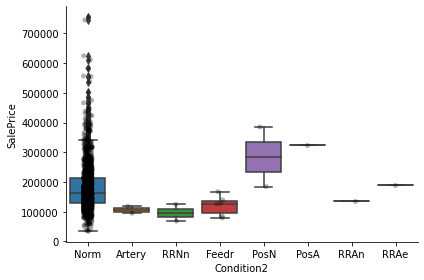

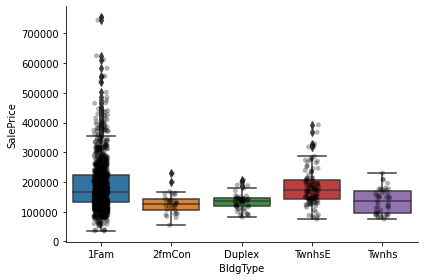

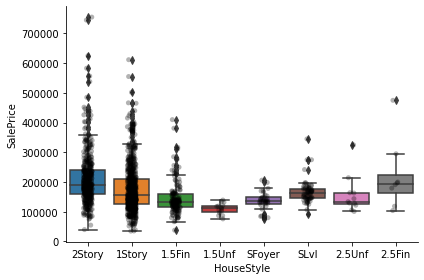

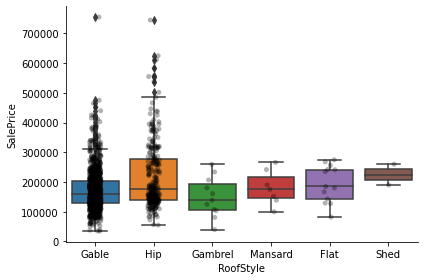

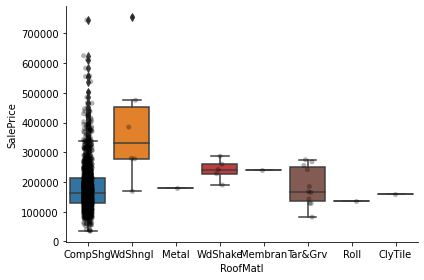

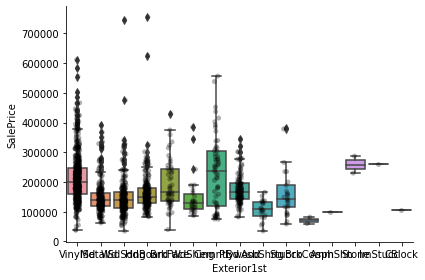

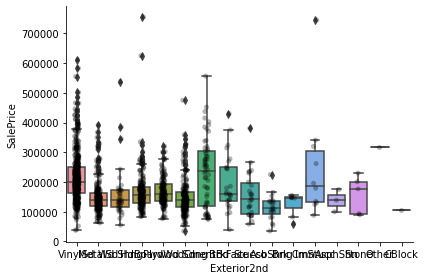

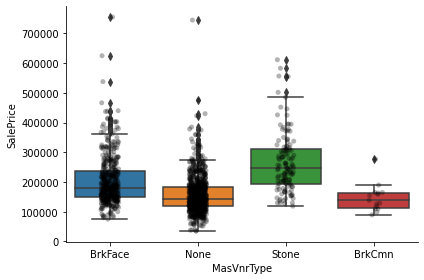

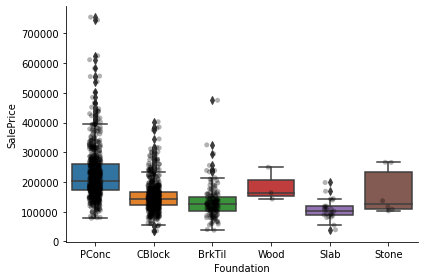

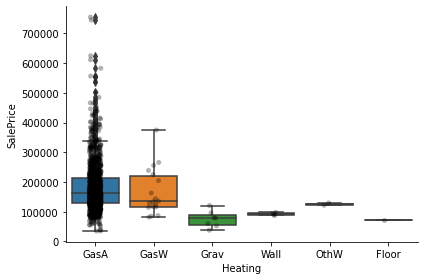

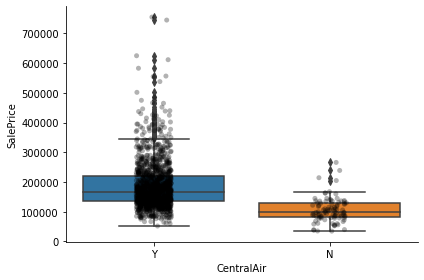

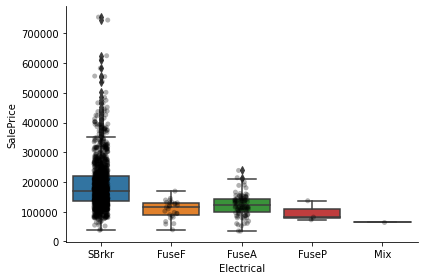

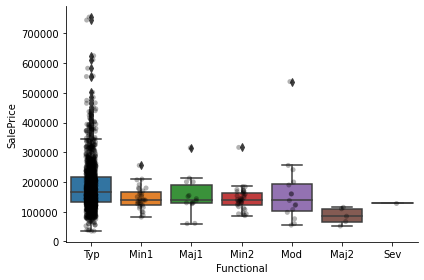

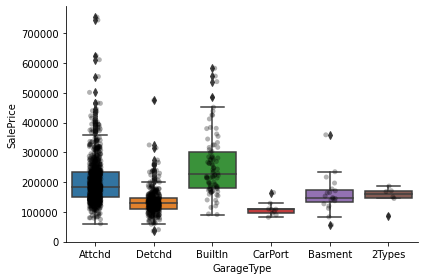

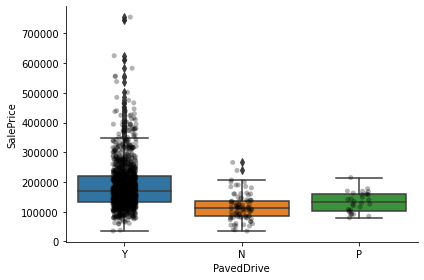

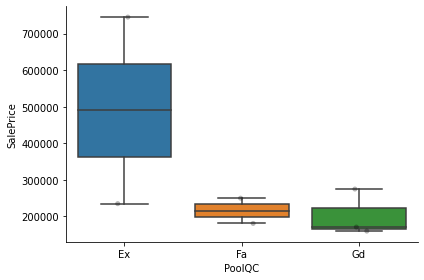

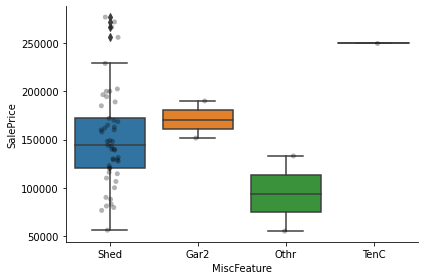

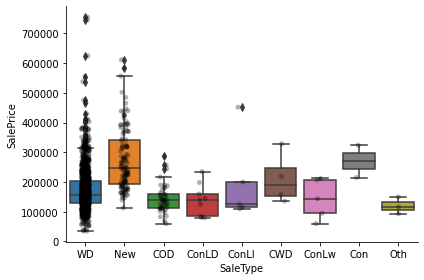

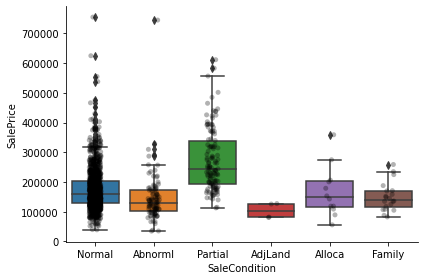

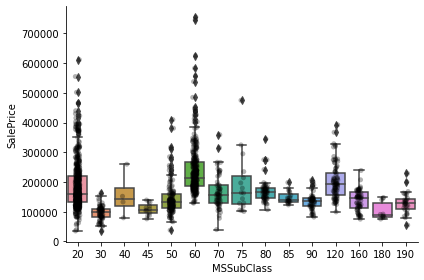

In [ ]:
for var in cat_others:
  sns.catplot(x = var, y = 'SalePrice', data = data, kind = 'box', height = 4, 
              aspect = 1.5)
  sns.stripplot(x = var, y = 'SalePrice', data = data, jitter = 0.1, alpha = 0.3, 
                color = 'k')
  plt.show()

# **Feature Engineering**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#para salvar o MinMaxScaler
import joblib

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
#Vamos determinar uma seed para garantir a reprodutibilidade do modelo desenvolvido


X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis = 1), data['SalePrice'], 
    test_size = 0.1, random_state = 0)

Vamos aplicar uma transformação logaritmica nos valores das casas para que a distribuição dos dados se aproxime de uma distribuição Gaussiana (como foi observado anteriormente na fase de analise dos dados).

In [ ]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [ ]:
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

cat_vars = cat_vars + ['MSSubClass']

X_train[cat_vars] = X_train[cat_vars].astype('O')
X_test[cat_vars] = X_test[cat_vars].astype('O')

In [ ]:
cat_vars_na = [var for var in cat_vars if X_train[var].isnull().sum() > 0]

X_train[cat_vars_na].isnull().mean().sort_values(ascending = False)

PoolQC          0.995434
MiscFeature     0.961187
Alley           0.938356
Fence           0.814307
FireplaceQu     0.472603
GarageCond      0.056317
GarageQual      0.056317
GarageFinish    0.056317
GarageType      0.056317
BsmtFinType2    0.025114
BsmtExposure    0.025114
BsmtFinType1    0.024353
BsmtCond        0.024353
BsmtQual        0.024353
MasVnrType      0.004566
Electrical      0.000761
dtype: float64

Vamos tratar agora os registros que estão ausentes na base de dados. Variáveis que possuem muitos registros ausentes, estes serão substituidos por uma string 'missing'. Já variáveis que não têm muitos registros ausentes serão substituídos pelo valor que mais frequente da base de dados. 

In [ ]:
missing_vars = [var for var in cat_vars_na 
                if X_train[var].isnull().mean() > 0.1]

freq_vars = [var for var in cat_vars_na 
                if X_train[var].isnull().mean() <= 0.1]

In [ ]:
# Preenchendo com 'Missing'

X_train[missing_vars] = X_train[missing_vars].fillna('Missing')
X_test[missing_vars] = X_test[missing_vars].fillna('Missing')


# Preenchendo com o rótulo mais frequente
for var in freq_vars:
  mode = X_train[var].mode()[0] # Retorna o rótulo que mais aparece em uma coluna

  print(var, mode)

  X_train[var].fillna(mode, inplace = True)
  X_test[var].fillna(mode, inplace = True)


MasVnrType None
BsmtQual TA
BsmtCond TA
BsmtExposure No
BsmtFinType1 Unf
BsmtFinType2 Unf
Electrical SBrkr
GarageType Attchd
GarageFinish Unf
GarageQual TA
GarageCond TA


In [ ]:
num_vars = [var for var in X_train.columns 
            if var not in cat_vars and var != 'SalePrice']

num_vars_na = [var for var in num_vars if X_train[var].isnull().sum() > 0]

X_train[num_vars_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

Para o tratamento dos registros ausentes de variáveis numéricas, vamos criar uma coluna que indica se o registro era ausente ou não e também substituir o valor ausente pela média da coluna. 

In [ ]:
for var in num_vars_na:

  mean_val = X_train[var].mean()

  print(var, mean_val)

  X_train[var + '_na'] = np.where(X_train[var].isnull(), 1, 0)
  X_test[var + '_na'] = np.where(X_test[var].isnull(), 1, 0)

  X_train[var].fillna(mean_val, inplace = True)
  X_test[var].fillna(mean_val, inplace = True)



LotFrontage 69.87974098057354
MasVnrArea 103.7974006116208
GarageYrBlt 1978.2959677419356


Vamos agora tratar as variáveis temporais. No caso vamos apenas calcular o intervalo de tempo entre a Venda da Casa e as demais variáveis temporáis.  

In [ ]:
def dif_tempo(df, var):
  df[var] = df['YrSold'] - df[var]
  
  return df

In [ ]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
  X_train = dif_tempo(X_train, var)
  X_test = dif_tempo(X_test, var)

X_train.drop(['YrSold'], axis = 1, inplace = True)
X_test.drop(['YrSold'], axis = 1, inplace = True)

Vamos fazer a transformação logarítmica de variáveis que não aparentavam uma distribuição normal e que não possuiam valores 0. 

In [ ]:
for var in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
  X_train[var] = np.log(X_train[var])
  X_test[var] = np.log(X_test[var])

Vamos aplicar a transformação Yeo-Johnson na variável *LotArea*.

In [ ]:
X_train['LotArea'], params = stats.yeojohnson(X_train['LotArea'])

X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'], lmbda = param)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1478: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Vamos fazer uma transformação binária nas variáveis que possuem um grande vies. 

In [ ]:
bias_var = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 
            'ScreenPorch', 'MiscVal']

for var in bias_var:
  X_train[var] = np.where(X_train[var] == 0, 0, 1)
  X_test[var] = np.where(X_test[var] == 0, 0, 1)

Vamos transformar as variáveis qualitativas.

In [ ]:
qual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
             'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for var in qual_vars:
  X_train[var] = X_train[var].map(qual_map)
  X_test[var] = X_test[var].map(qual_map)


#---Exposure var:
exposure_map = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

X_train[var] = X_train[var].map(exposure_map)
X_test[var] = X_test[var].map(exposure_map)


#---Finish vars:
finish_map = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 
                   'ALQ': 5}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
  X_train[var] = X_train[var].map(finish_map)
  X_test[var] = X_test[var].map(finish_map)


#---Garage var:
garage_map = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_train[var] = X_train[var].map(garage_map)
X_test[var] = X_test[var].map(garage_map)

#---Fence var:
fence_map = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_train[var] = X_train[var].map(fence_map)
X_test[var] = X_test[var].map(fence_map)

Removendo os Rótulos Raros

In [ ]:
qual_vars = qual_vars + finish_vars + ['BsmtExposure', 'GarageFinish', 'Fence']

cat_others = [var for var in cat_vars if var not in qual_vars]

In [ ]:
cat_others

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass']

In [ ]:
rotulos_freq(data, 'MSZoning', 0.01)

Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

In [ ]:
data['MSZoning'].value_counts()/len(data)

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64

In [ ]:
def rotulos_freq(df, var, perc):
  
  df = df.copy()

  tmp = df.groupby(var)[var].count()/len(df)
  # retorna os rótulos que tem um percentual maior que o passado para a função
  return tmp[tmp > perc].index

for var in cat_others:
  freq_rot = rotulos_freq(data, var, 0.01)
  print(var, freq_rot)
  print()

  # caso o valor esteja presente na lista de valores frequentes, o valor é mantido
  # caso contrário, o registro é substituido por 'Rare'
  X_train[var] = np.where(X_train[var].isin(freq_rot), X_train[var], 'Rare')
  X_test[var] = np.where(X_test[var].isin(freq_rot), X_test[var], 'Rare')

MSZoning Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')

Street Index(['Pave'], dtype='object', name='Street')

Alley Index(['Grvl', 'Pave'], dtype='object', name='Alley')

LotShape Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')

LandContour Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')

Utilities Index(['AllPub'], dtype='object', name='Utilities')

LotConfig Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')

LandSlope Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')

Neighborhood Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')

Condition1 Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')

Condition2 Ind

Vamos transformar agora as colunas que contém string em variáveis discretas.

In [ ]:
def subst_cat(train, test, y_train, var, target):
  # une as variáveis de treinamento com o rótulo
  tmp = pd.concat([X_train, y_train], axis = 1)
  
  # agrupa pela variável estudada e tira a média do valor da venda das casas
  # e organiza o valor médio em ordem crescente e extrai os índices desse df.
  rotulos_ordenados = tmp.groupby([var])[target].mean().sort_values().index

  # 1- enumerate pega os elementos da variavel passada no primeiro campo e 
  # define uma chave para cada um dos elementos, no caso iniciada pelo
  # segundo elemento passado. Isso geral uma tupla
  # 2- for i, k separa os elementos da tupla. No caso, queremos só a variável e 
  # não sua chave
  # 3- Por fim, estamos criando um dicionário que é usado para substituir os 
  # valores no DF atraves da função map
  ordinal_label = {k: i for i, k in enumerate(rotulos_ordenados, 0)}

  print(var, ordinal_label)
  print()

  train[var] = train[var].map(ordinal_label)
  test[var] = test[var].map(ordinal_label)


In [ ]:
for var in cat_others:
  subst_cat(X_train, X_test, y_train, var, 'SalePrice')

MSZoning {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4}

Street {'Rare': 0, 'Pave': 1}

Alley {'Grvl': 0, 'Pave': 1, 'Rare': 2}

LotShape {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3}

LandContour {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3}

Utilities {'Rare': 0, 'AllPub': 1}

LotConfig {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4}

LandSlope {'Gtl': 0, 'Mod': 1, 'Rare': 2}

Neighborhood {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22}

Condition1 {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5}

Condition2 {'Rare': 0, 'Norm': 1}

BldgType {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4}

HouseStyle {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5

Com as transformações realizadas acima, uma relação monotonica é estabelecida entre as variáveis de treinamento e os rótulos (preço médio das casas). 

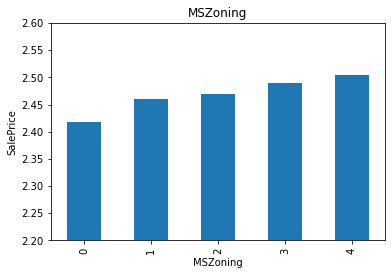

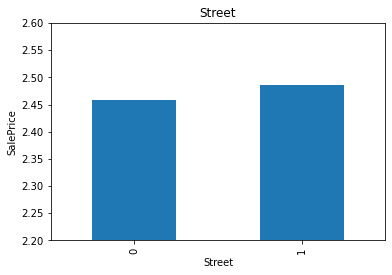

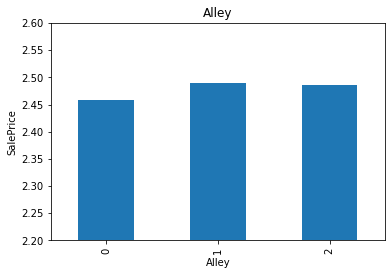

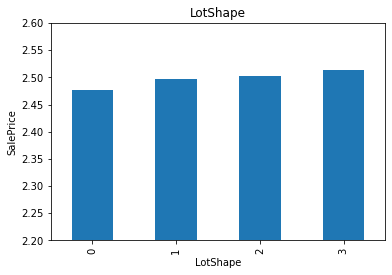

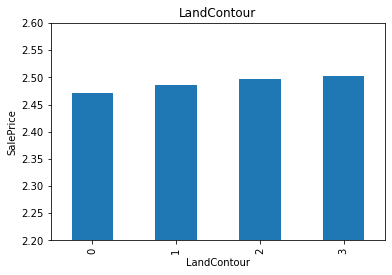

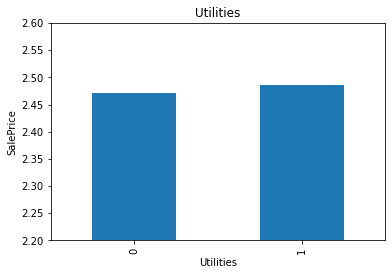

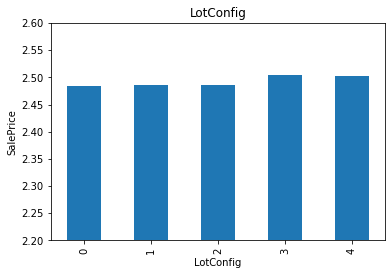

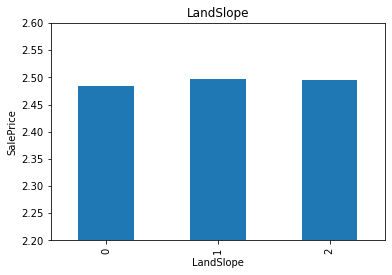

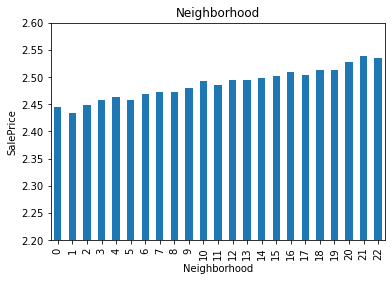

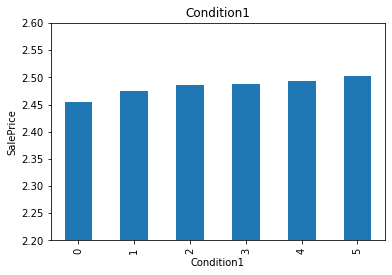

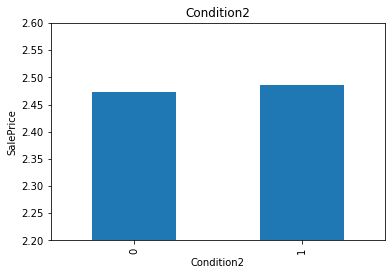

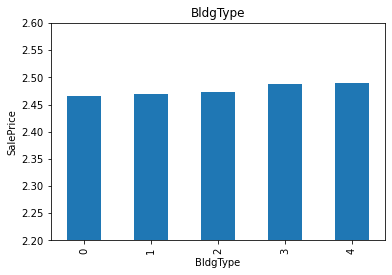

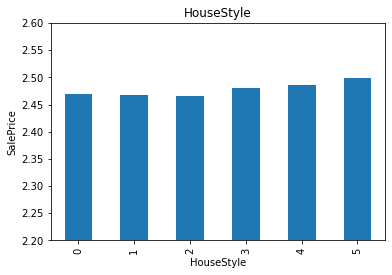

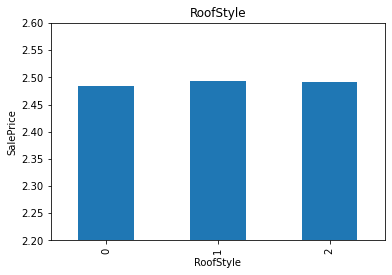

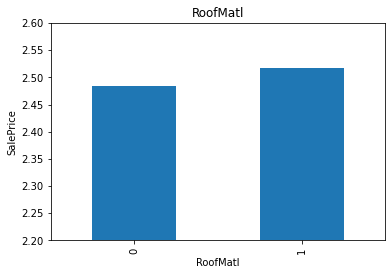

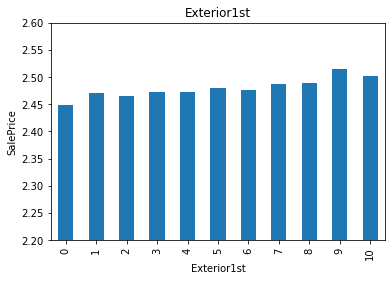

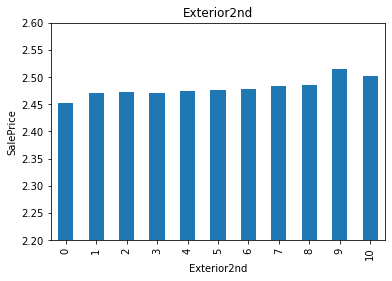

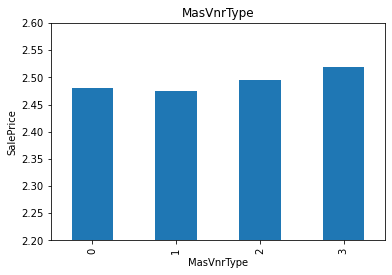

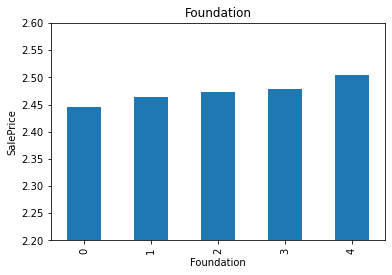

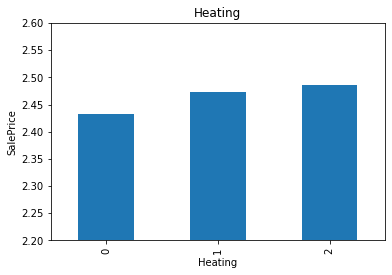

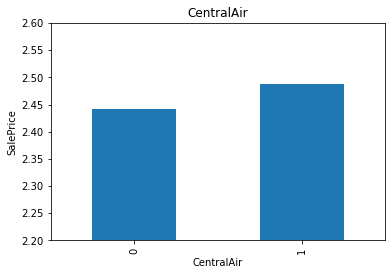

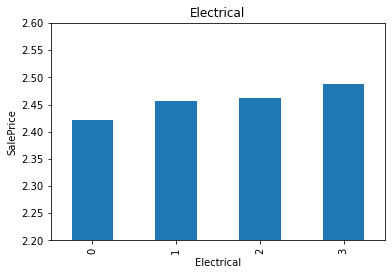

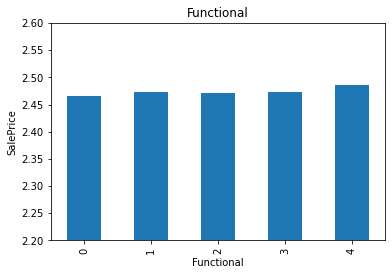

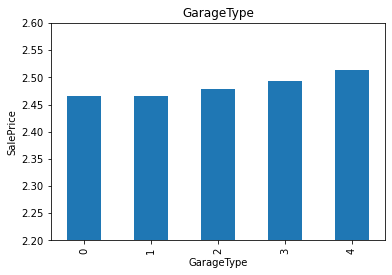

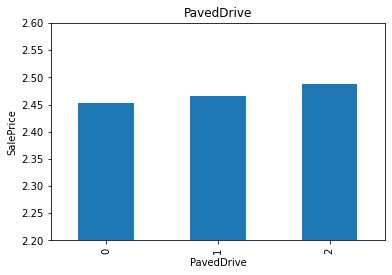

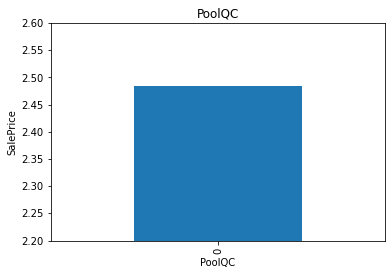

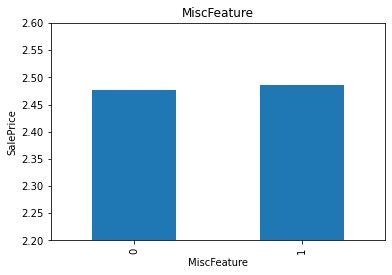

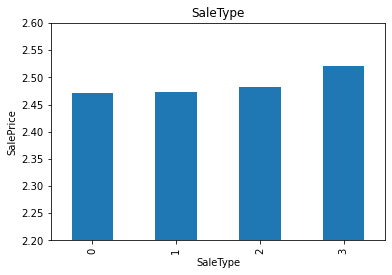

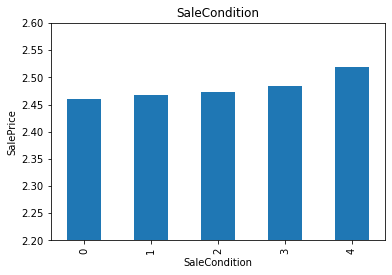

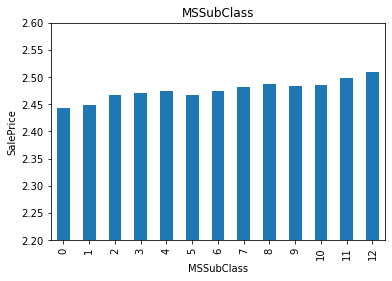

In [ ]:
def analise_vars(train, y_train, var):

  tmp = pd.concat([X_train, np.log(y_train)], axis = 1)

  tmp.groupby(var)['SalePrice'].median().plot.bar()
  plt.title(var)
  plt.ylim(2.2, 2.6)
  plt.ylabel('SalePrice')
  plt.show()

for var in cat_others:
  analise_vars(X_train, y_train, var)

Normalização das variáveis. 

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

Salvando os Dataframes e o Scaler

In [ ]:
# dataframes
X_train.to_csv('xtrain.csv', index = False)
X_test.to_csv('xtest.csv', index = False)

y_train.to_csv('ytrain.csv', index = False)
y_test.to_csv('ytest.csv', index = False)

# scaler
joblib.dump(scaler, 'minmax_scaler.joblib')

['minmax_scaler.joblib']

##**Feature Selection**

Vamos fazer agora a seleção dos parâmetros que serão utilizados como input para o modelo de predição. Lembrando que o treinamento com muitos campos pode levar a um overfiting e dificulta o deploy do modelo. 

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
# Lasso penaliza algumas váriaveis de forma a tentar reduzir o overfiting do modelo

# Estabelecemos a semente de forma a garantir a reprodutibilidade do modelo quando
# colocarmos este em produção. 
sel = SelectFromModel(X_train, y_train, random_state = 0)